In [6]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

In [7]:
data = pd.read_csv("../cleaned_data/correct_data.csv")

ID = pd.read_csv("../cleaned_data/preMCOHIHM.csv")

df = pd.DataFrame(data)

ID_df = pd.DataFrame(ID)

ID_df = ID_df["Panel ID"].unique()

ID_df = pd.DataFrame({"Panel ID" : list(ID_df)})

#print(df.columns)

#print(ID_df.columns)

df = pd.merge(ID_df, df, how='left', on='Panel ID')

df = (df.groupby(["Panel ID", "Date"]))

list_of_unique = list(df["Category"].unique())

flattened = [i for t in list_of_unique  for i in t]
groceries = list(set(flattened))
rules = list(permutations(groceries, 2))
rules_df = pd.DataFrame(rules, columns=['antecedents', 'consequents'])

encoder = TransactionEncoder().fit(list_of_unique)

onehot = encoder.transform(list_of_unique)

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

<bound method NDFrame.head of            antecedents      consequents  rule
129               Cake         Biscuits   129
143          Chocolate         Biscuits   143
151      Confectionery         Biscuits   151
188               Kaya         Biscuits   188
217              Snack         Biscuits   217
367             Butter             Eggs   367
541               Cake             Eggs   541
1107         Chocolate            Snack  1107
1141      Coconut Milk             Eggs  1141
1809             Flour             Eggs  1809
1829              Kaya             Eggs  1829
1835         Margarine             Eggs  1835
1843     Peanut Butter             Eggs  1843
1849              Rice             Eggs  1849
1855  Seasoning Powder             Eggs  1855
1865             Sugar             Eggs  1865
2199      Instant Soup  Instant Noodles  2199>


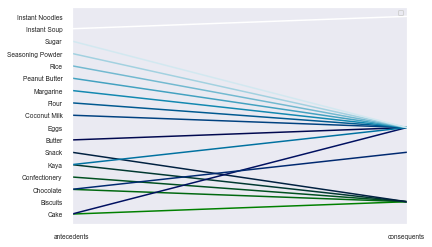

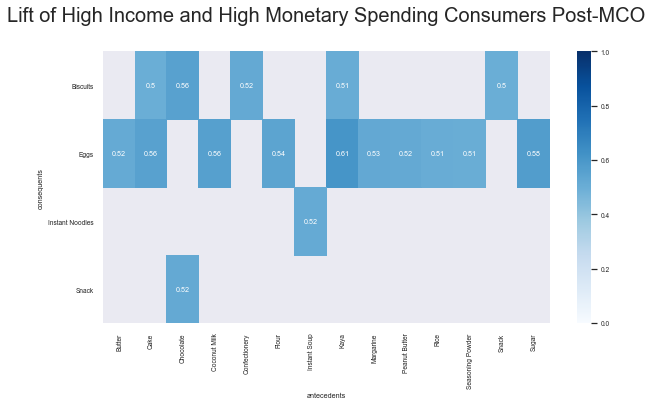

In [16]:
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True, max_len = 2)

rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0)

rules = rules[rules['support'] > 0.01]
rules = rules[rules['confidence'] > 0.5]
#rules = rules[rules['lift'] > 3]
rules['antecedents'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequents'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])

rules.to_csv (r'C:\Users\User\Desktop\NUS\Year 3 Sem 1\DSA3101\Hackerthon\MBA_PreMCO_HIHM.csv', index = False, header=True)

rules['rule'] = rules.index

coords = rules[['antecedents','consequents', 'rule']]

print(coords.head)

parallel_coordinates(coords, 'rule', colormap = 'ocean')
plt.legend([])
plt.show()

pivot = rules.pivot(index = 'consequents', columns = 'antecedents', values= 'confidence')

fig = plt.figure(figsize=(10,5))
sns.set(font_scale= 0.6)

sns.heatmap(pivot, annot = True, cbar = True, cmap = 'Blues', vmin = 0, vmax = 1)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Lift of High Income and High Monetary Spending Consumers Post-MCO", fontsize = 20, pad = 30)

#fig.savefig('postMCOHIHM_lift.jpg', bbox_inches='tight', dpi=150)

plt.show()
#coords = rules_to_coordinates(rules)